<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/TensorFlow_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.18.0


In [2]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Loading the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train /255.0, x_test /255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
K = len(set(y_train))
print('Number of classes', K)

Number of classes 10


In [5]:
# Build the model using the API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i) # 3 color channels
x = Conv2D(64, (3,3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)


In [6]:
# Compile and fit
# We must use a GPU+
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3607 - loss: 1.7379 - val_accuracy: 0.5353 - val_loss: 1.2699
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5345 - loss: 1.2887 - val_accuracy: 0.6116 - val_loss: 1.0912
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5991 - loss: 1.1253 - val_accuracy: 0.6384 - val_loss: 1.0139
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6344 - loss: 1.0240 - val_accuracy: 0.6583 - val_loss: 0.9644
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6641 - loss: 0.9489 - val_accuracy: 0.6911 - val_loss: 0.8932
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6829 - loss: 0.8872 - val_accuracy: 0.6995 - val_loss: 0.8646
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7061 - loss: 0.8239 - val_accuracy: 0.6951 - val_loss: 0.8759
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7206 - loss: 0.78

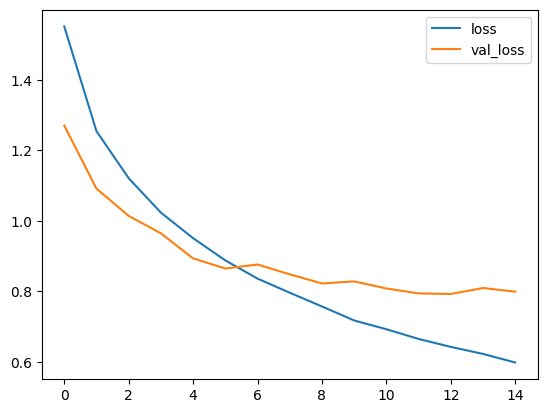

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
# overfitting

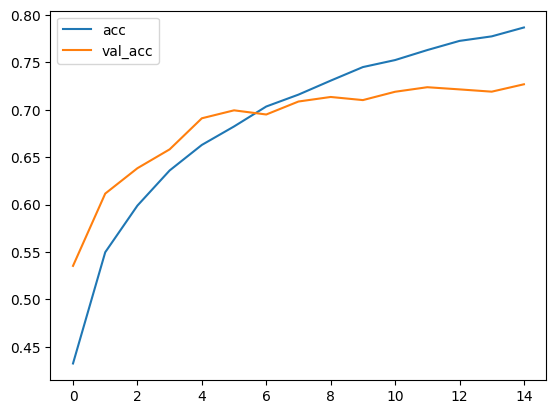

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
# overfitting

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
This function prints and plots the confusion matrix.
Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest')
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color= 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')
  plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Confusion matrix, without normalization
[[719  11  62  25  20   9   9  13  94  38]
 [ 17 836   6  15   3   6  18   3  26  70]
 [ 40   1 634  87  75  60  62  21  10  10]
 [ 17   1  72 562  57 180  57  38   5  11]
 [ 13   2  75  86 638  51  51  74   9   1]
 [  7   1  54 208  36 610  33  42   7   2]
 [  1   4  28  71  29  21 832   7   5   2]
 [  9   2  30  44  44  53   7 797   5   9]
 [ 28  18  13  23  10  10  12   4 856  26]
 [ 22  74  10  22   5  12  14  19  36 786]]


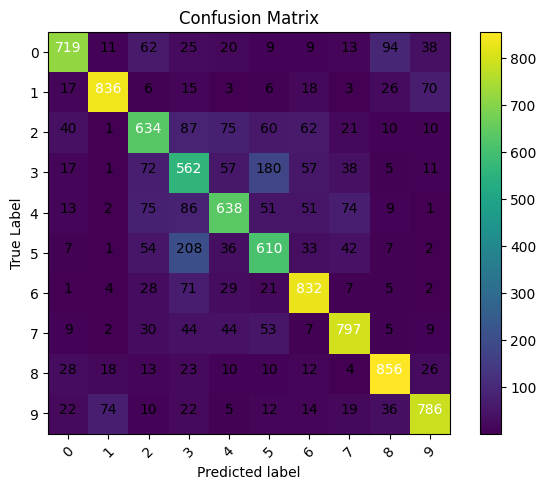

In [12]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: deer Predicted: airplane')

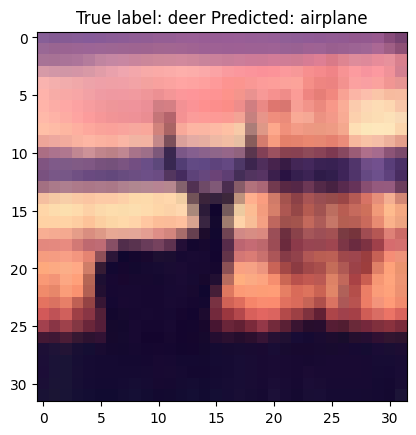

In [24]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))